In [1]:
!pip install pandas matplotlib seaborn scikit-learn


# **Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


# **Load the Dataset**

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']  # Rename columns
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Data Cleaning & Basic Info**

In [4]:
print("Dataset shape:", df.shape)
print("\nChecking for null values:")
print(df.isnull().sum())

print("\nLabel distribution:")
print(df['label'].value_counts())


Dataset shape: (5572, 2)

Checking for null values:
label      0
message    0
dtype: int64

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


# ** Visualize Label Distribution**

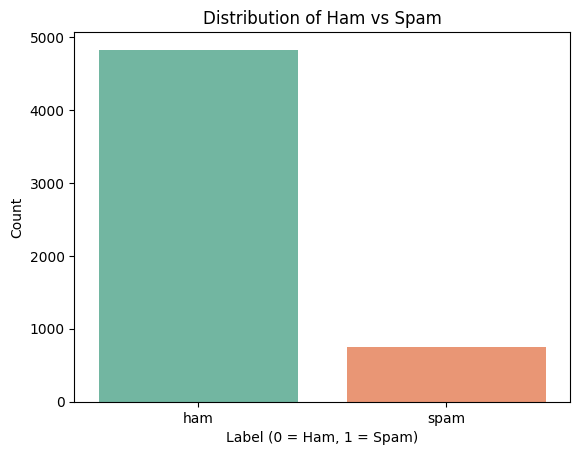

In [5]:
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Distribution of Ham vs Spam")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()


# **Convert Labels to Numeric**

In [6]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


# **Message Length Feature**

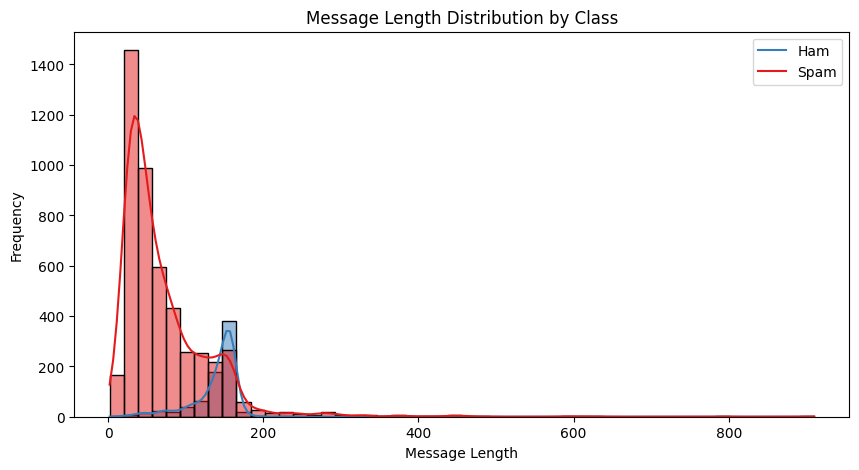

In [7]:
df['message_length'] = df['message'].apply(len)

# Plot message length comparison
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, palette='Set1')
plt.title("Message Length Distribution by Class")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.legend(labels=['Ham', 'Spam'])
plt.show()


# ***Train-Test Split***

In [8]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ***Text Vectorization using TF-IDF***

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# ***Model Training & Evaluation***

# ***A. Naive Bayes Model***

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("🔹 Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_nb))


🔹 Naive Bayes Accuracy: 0.9668161434977578
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# *** B. Logistic Regression Model***

In [11]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Accuracy: 0.9524663677130045
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



# ***C. Support Vector Machine (SVM) Model***

In [12]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_svm))


🔹 SVM Accuracy: 0.97847533632287
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# **Confusion Matrix for One Model (Optional)**

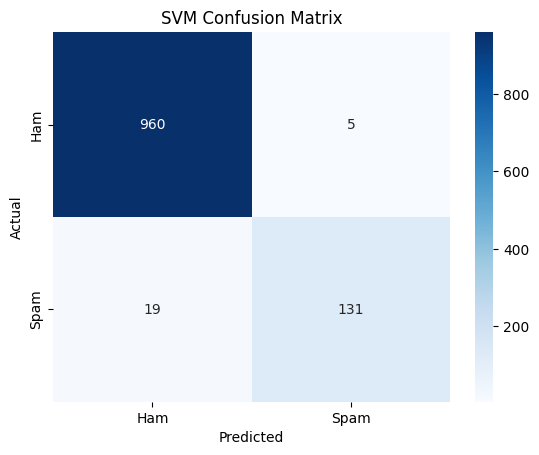

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


**Test**

# **Try Your Own SMS:**

In [14]:
def predict_sms(message):
    msg_tfidf = tfidf.transform([message])
    pred = svm_model.predict(msg_tfidf)[0]
    return "Spam" if pred == 1 else "Ham"

# Example
predict_sms("Congratulations! You've won a free ticket. Click here to claim.")


'Spam'